# Продвинутое машинное обучение: ДЗ 1

Задание: [link](https://logic.pdmi.ras.ru/~sergey/teaching/mademl2021.html)
Выполнил: **Полянских Сергей, февраль 2021**

- [Часть I: О теореме Байеса](#Часть-I:-О-теореме-Байеса)
  1. [Прокурор](#Задача-1:-Прокурор)
  2. [Адвокат](#Задача-2:-Адвокат)
  3. [Коронавирус](#Задача-3:-Коронавирус)
  
- [Часть II: О линейной регрессии](#Часть-II:-О-линейной-регрессии)
  1. [Данные](#Задача-1:-Данные)
  2. [Регрессия c exp](#Задача-2:-Регрессия-с-Exp)
  3. [Регрессия с erf](#Задача-3:-Регрессия-с-Erf)
  4. [Бонус](#Задача-4:-Бонус)
  5. [Мысли](#Задача-5:-Мысли)

## Часть I: О теореме Байеса

### Задача 1: Прокурор

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Решение:

Положим 

    А = {у человека та самая группа крови}
    B = {человек виновен}
    
Имеем:

    P(A) = 0.01,  P(A|B) = 1



Прокурор рассуждает о вероятности $P(A|\bar{B})$, причем утверждает, что она равна 0.01.
Тут есть сразу две ошибки:
- Во-первых, эта вероятность не равна 0.01. Единственное, из чего это могло бы следовать в данных условиях: $P(A| \bar{B}) = P(A)$, а это вообще говоря неверное равенство.
- Во-вторых, он как прокурор должен рассуждать о вероятности $P(B|A)$, а не о $P(A|\bar{B})$. Только это и имело бы смысл для обвинения.

### Задача 2: Адвокат

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.

### Решение:

В обозначениях решения выше:

Адвокат рассуждает о вероятности $P(\bar{A})$.
Его ошибка в том, что он должен рассуждать о вероятности $P(\bar{B}|A)$ - о невиновности, а не об общей статистике по группе крови, которая в общем не имеет к убийствам никакого отношения.

### Задача 3: Коронавирус

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

### Решение:

Пусть

    B = {есть болезнь}
    A = {тест положительный}
    
Пусть
$P(A|\bar{B}) = x$ - false positive вероятность, $P(\bar{A}|B) = y$ - false negative вероятность.
    
По условию изначально $x = y = 0.05$, $P(B) = 0.01$.

По формуле Байеса:
$$
P(B|A) = \frac{0.01(1 - y)}{0.01(1 - y) + 0.99x} = p(x, y)
$$
$$
P(B|\bar{A}) = \frac{0.01y}{0.01y + 0.99(1 - x)} = q(x, y)
$$

1. Оценим вероятность $q$:
$$
x,y \leqslant 0.05 \implies q(x,y) \leqslant \frac{0.01y}{0.01y + 0.99\cdot0.95} \leqslant \frac{0.01\cdot0.05}{0.99\cdot0.95} \approx 0.0005
$$
Значит вероятность быть больным, если тест отрицательный всегда (ожидаемо) очень мала - **ее можно не учитывать в оптимизации и скорцентрироваться на вероятности болезни при условии положительного теста**.

2. Оптимизируем вероятность $p$:

Система

$$
\frac{\partial p}{\partial x} = -\frac{0.99\cdot0.01(1 - y)}{\left(0.01\right(1 - y) + 0.99x)^2} = 0,
$$

$$
\frac{\partial p}{\partial y} = -\frac{0.99\cdot0.01x}{\left(0.01\right(1 - y) + 0.99x)^2} = 0
$$

не имеет решения в рассматриваемой нами области $0 \leqslant x \leqslant 0.05, 0 \leqslant y \leqslant 0.05$. Значит оптимум нашей (непрерывной) функции $p(x, y)$ находится на границе области. Отсюда следует, что **решение врачей не ждать помощи от государства и сконцентрироваться только на оптимизации по какой-то одной ошибке - верное, так как оптимизация сразу по двум ошибками все равно ничего нового бы не дала**.

Собственно, оптимизацию, продемонстрируем на графиках.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prob_p(x, y):
    return (1 - y) * 0.01 / ((1 - y) * 0.01 + x * 0.99)


def prob_q(x, y):
    return y * 0.01 / (y * 0.01 + (1 - x) * 0.99)


def plot_res(x, y, axis, title, xlabel, ylim=1):
    axis.plot(x, y, lw=2)
    axis.set_xlim(0, 0.05)
    axis.set_ylim(0, ylim)
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel('Prob')

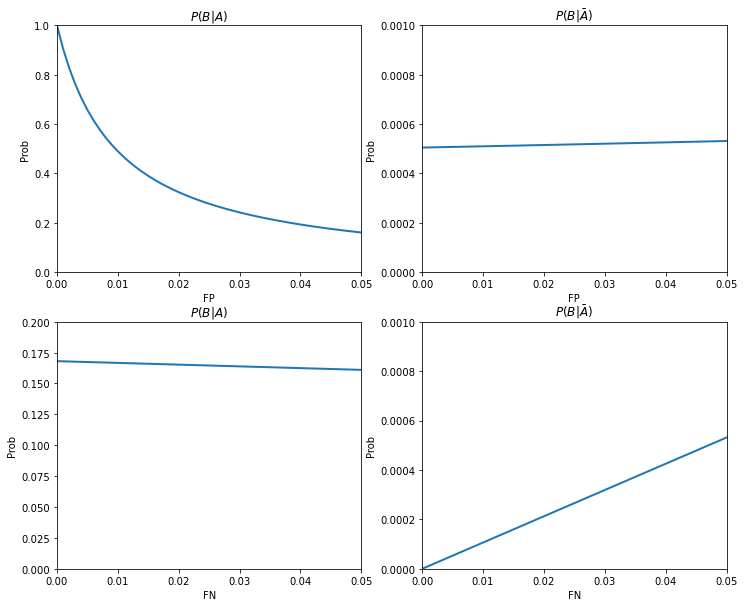

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

x_start = 0.05
y_start = 0.05

x = np.arange(0, 0.051, 0.001)
p = prob_p(x, y_start)
q = prob_q(x, y_start)
plot_res(x, p, axes[0][0], r'$P(B|A)$', 'FP', 1)
plot_res(x, q, axes[0][1], r'$P(B|\bar{A})$', 'FP', 0.001)

y = np.arange(0, 0.051, 0.001)
p = prob_p(x_start, y)
q = prob_q(x_start, y)
plot_res(y, p, axes[1][0], r'$P(B|A)$', 'FN', 0.2)
plot_res(y, q, axes[1][1], r'$P(B|\bar{A})$', 'FN', 0.001)

plt.show()

**Выводы:**
- не имеет особого смысла оптимизировать вероятность быть больным, если тест отрицательный, так как она всегда очень мала и мало меняется от своих аргументов.
- вероятность быть больным при условии положительного теста имеет смысл оптимизировать только по false positive параметру. При этом **уменьшение false positive ведет к существенному увеличению достоверности**.
- оптимизация только по одному аргументу сама "оптимальна" - результат совпадает с полной двумерной оптимизацией.

## Часть II: О линейной регрессии

### Задача 1: Данные

https://ourworldindata.org/coronavirus-source-data

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

### Решение:

Мы ограничимся не всеми датами, а только до 2020-09-01, так как это последняя дата далее в задании, а дальше начинается что-то явно не экспоненциальное. 

In [4]:
from tqdm import tqdm
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [5]:
MARCH_3 = '2020-03-03'
TRAIN_DAYS = 50
MAY_1_DAY = 59
JUNE_1_DAY = 90
SEPT_1_DAY = 182

In [6]:
data = pd.read_csv('owid-covid-data.csv',  parse_dates=True)
data_ru = data[(data['iso_code'] == 'RUS') & (data['date'] >= MARCH_3)]
data_ru.loc[data_ru['new_cases']==0, 'new_cases'] = 1
data_ru = data_ru[['date', 'total_cases', 'new_cases']].reset_index(drop=True)
data_ru['day'] = data_ru.index
data_ru = data_ru.iloc[:SEPT_1_DAY + 1, :].sort_values('date').set_index('date')

data_ru.tail()

,total_cases,new_cases,day
date,,,
2020-08-28,977730.0,4758.0,178
2020-08-29,982573.0,4843.0,179
2020-08-30,987470.0,4897.0,180
2020-08-31,992402.0,4932.0,181
2020-09-01,997072.0,4670.0,182


In [7]:
data_ru_train = data_ru[:TRAIN_DAYS]
data_ru_test = data_ru[TRAIN_DAYS:]

### Задача 2: Регрессия с Exp

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

    a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.
  
    b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

    c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


### Решение:

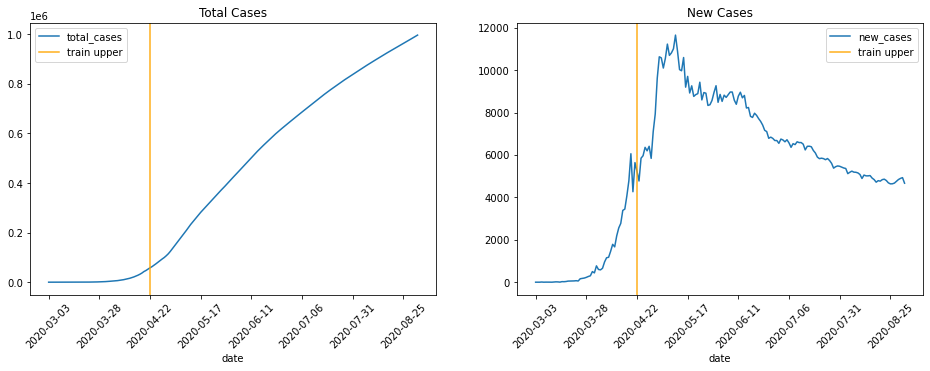

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

data_ru['total_cases'].plot(ax=axes[0])
data_ru['new_cases'].plot(ax=axes[1])
axes[0].axvline(x=TRAIN_DAYS, color='orange', alpha=0.9, label='train upper')
axes[0].legend()
axes[0].set_title('Total Cases')
axes[1].axvline(x=TRAIN_DAYS, color='orange', alpha=0.9, label='train upper')
axes[1].legend()
axes[1].set_title('New Cases')

plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.show()

Достаточно рассмотреть только первую переменную total_cases, так как для new_cases, очевидно, для экспоненты ничего хорошего не получится. Это связано, по-видимому, с тем, что после 2020-05-01 коронавирус отступил по приказу президента РФ. 

Для оценки апостериорного распределения параметров регрессии будем использовать явные формулы из лекции:

$$
\Sigma_N = \left(\Sigma_0^{-1} + \frac{1}{\sigma^2}X^TX\right)^{-1},
$$ 
$$
\mu_N = \Sigma_N\left(\Sigma_0^{-1}\mu_0 + \frac{1}{\sigma^2}X^Ty\right).
$$

**Утилиты:**

Скучные функии по отрисовке графиков и стандартным вычислениям вынесены в скрипт utils.py.

In [9]:
from utils import (prepare_x, 
                   estimate_sigma, 
                   plot_distribution,
                   sample_exponents, 
                   sample_errfs, 
                   plot_parameter_cloud)

In [10]:
class BayesianRegression:
    """ Инкапсулирует байесовские обновления параметров. """
    def __init__(self, alpha, sigma, dim=2):
        self.alpha = alpha
        self.sigma = sigma
        self.dim = dim
        self.sigma_N = np.eye(dim) / alpha
        self.mu_N = np.zeros(dim)

    def fit(self, x, y):
        X = prepare_x(x, self.dim)
        sigma_N_inv = np.linalg.inv(self.sigma_N)
        self.sigma_N = np.linalg.inv(sigma_N_inv + np.dot(X.T, X)/self.sigma**2)
        self.mu_N = self.sigma_N.dot(sigma_N_inv.dot(self.mu_N) + np.dot(X.T, y)/self.sigma**2)
        
    def predict(self, x):
        X = prepare_x(x, self.dim)
        return X.dot(self.mu_N)

**Обучение:**

In [11]:
x = data_ru_train['day'].values
y = np.log(data_ru_train['total_cases'].values)
sigma = estimate_sigma(x, y)
alpha = 0.1

model = BayesianRegression(alpha, sigma)
model.fit(x, y)

**Распределение параметров:**

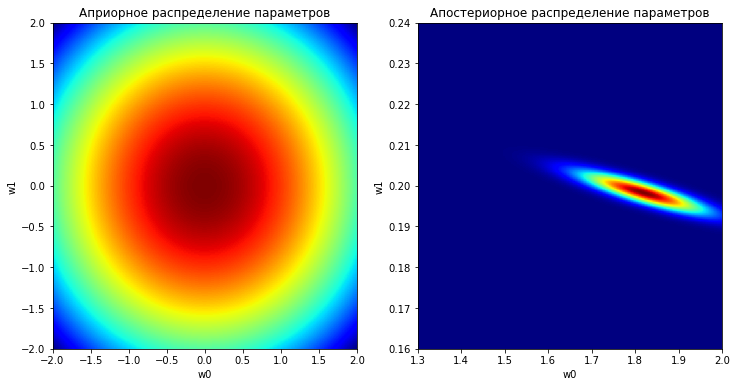

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_distribution(np.zeros(2), np.eye(2)/model.alpha, 
                  ((-2, 2),(-2, 2)), 
                  "Априорное распределение параметров",
                  axes[0])
plot_distribution(model.mu_N, model.sigma_N, 
                  ((1.3, 2.0),(0.16, 0.24)), 
                  "Апостериорное распределение параметров",
                  axes[1])
plt.show()

**Сэмплинг:**

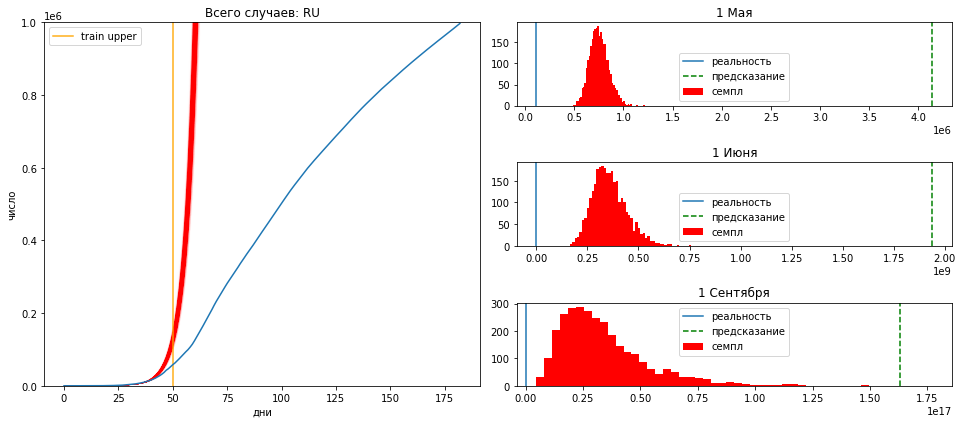

In [13]:
result = sample_exponents(data_ru, model, 'RU', figsize=(13.5, 6))

In [14]:
print('Предсказания модели на 1 мая:', int(result['preds'][MAY_1_DAY]))
print('Предсказания модели на 1 июня:', int(result['preds'][JUNE_1_DAY]))
print('Предсказания модели на 1 сентября:', int(result['preds'][SEPT_1_DAY]))

Предсказания модели на 1 мая: 4141352
Предсказания модели на 1 июня: 1938474873
Предсказания модели на 1 сентября: 163029442246366944


In [15]:
print('Усредненные предсказания модели на 1 мая:', int(np.mean(result['may_1'])))
print('Усредненные предсказания модели на 1 июня:', int(np.mean(result['june_1'])))
print('Усредненные предсказания модели на 1 сентября:', int(np.mean(result['sept_1'])))

Усредненные предсказания модели на 1 мая: 751567
Усредненные предсказания модели на 1 июня: 358571391
Усредненные предсказания модели на 1 сентября: 34091027333841540


Очевидно, предсказания не особенно достоверные.

### Задача 3: Регрессия с Erf



Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

$$
\Phi(x) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^x e^{-t^2/2}dt
$$

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

    a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

    b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

    c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


### Решение:

Величины 'total_cases' и 'new_cases' связанны соотношением:

    data_ru['new_cases'] = np.diff(data_ru['total_cases']
    
с точностью до сдвига на 1 и замены 0 на 1 в 'new_cases', которую мы проводили вначале для удобства.

Проще говоря, если
$$
y(x) \sim C\int_{-\infty}^{Ax + B} e^{-t^2/2}dt,
$$
то
$$
y'(x) \sim ACe^{-(Ax + B)^2/2} = e^{w_0 + w_1x + w_2x^2}
$$
с некоторыми постоянными $w_0, w_1, w_2$.

Значит для наших целей будет достаточно **обучить квадратичную регрессию для $\ln y'$**, чем далее и займемся.

**Важный момент:** можно заметить, что $w_2 = -A^2/2$, то есть по самому физическому смыслу модели коэффициент при квадрате не может быть положительным. Но в итоговой постановке параметры $w_0, w_1, w_2$ предполагаются нормально распределенными, то есть вполне может случиться так, что $w_2\geqslant0$. 
Физически такое явление может означать, что сами данные указывают на то, что пик пандемии на TRAIN периоде в 50 дней еще не был достигнут и erf-модель не может нормально обучиться.
По-видимому, в таких случаях без увеличения TRAIN периода делать особо нечего - говорим, что **erf-модель в данном случае неприменима** (ну или по крайней мере неприменим предлагаемый метод ее обучения через регрессию). Для RU модели все будет нормально, но для некоторых стран далее такой случай будет иметь место.

**Обучение:**

In [16]:
x = data_ru_train['day'].values

y = np.log(data_ru_train['new_cases'].values)
sigma = estimate_sigma(x, y, dim=3)
alpha = 0.1

model = BayesianRegression(alpha, sigma, dim=3)
model.fit(x, y)

**Распределение параметров:**

по $w_2$ дисперсия очень мала - плотность практически двумерна по $w_0, w_1$, поэтому распределение достаточно построить только в этих координатах.

In [17]:
np.round(model.sigma_N, 4)

array([[ 0.0396, -0.0032,  0.0001],
       [-0.0032,  0.0004, -0.    ],
       [ 0.0001, -0.    ,  0.    ]])

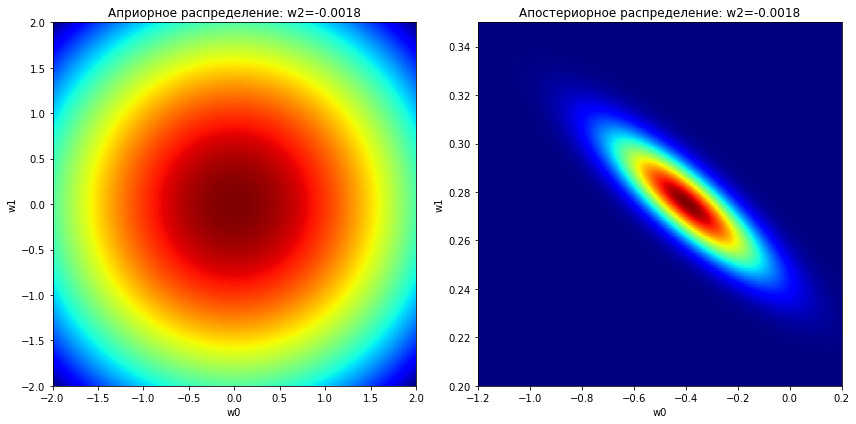

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


plot_distribution(np.zeros(2), np.eye(2)/model.alpha, 
                  ((-2, 2),(-2, 2)), 
                  f"Априорное распределение: w2={round(model.mu_N[2], 4)}",
                  axes[0])
plot_distribution(model.mu_N[[0, 1]], model.sigma_N[:2, :2], 
                  ((-1.2, 0.2),(0.2, 0.35)), 
                  f"Апостериорное распределение: w2={round(model.mu_N[2], 4)}",
                  axes[1])

plt.tight_layout()
plt.show()

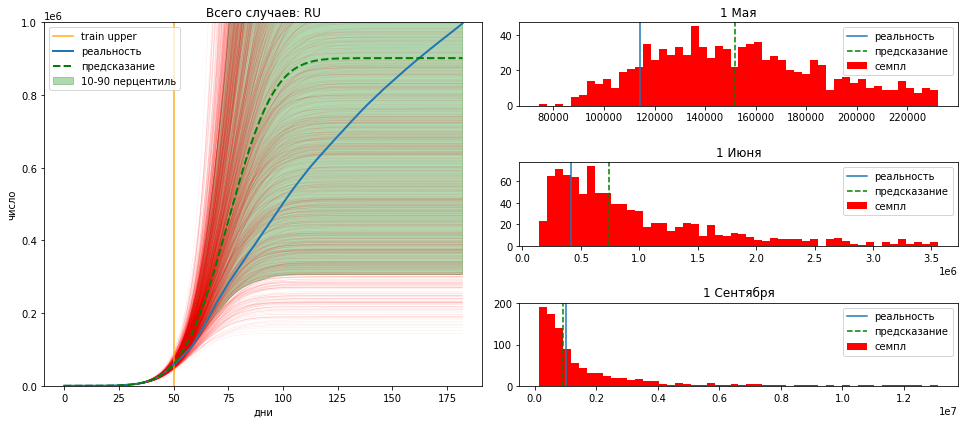

In [19]:
preds, samples = sample_errfs(data_ru, model, 'RU', 
                              days=[MAY_1_DAY, JUNE_1_DAY, SEPT_1_DAY], 
                              day_labels=['1 Мая', '1 Июня', '1 Сентября'], 
                              n_samples=1000, figsize=(13.5, 6))

In [20]:
print('Предсказания модели на 1 мая:', int(preds[MAY_1_DAY]))
print('Предсказания модели на 1 июня:', int(preds[JUNE_1_DAY]))
print('Предсказания модели на 1 сентября:', int(preds[SEPT_1_DAY]))

Предсказания модели на 1 мая: 152005
Предсказания модели на 1 июня: 739230
Предсказания модели на 1 сентября: 901719


In [21]:
mean_result = samples.mean(axis=1)

print('Усредненные предсказания модели на 1 мая:', int(mean_result[MAY_1_DAY]))
print('Усредненные предсказания модели на 1 июня:', int(mean_result[JUNE_1_DAY]))
print('Усредненные предсказания модели на 1 сентября:', int(mean_result[SEPT_1_DAY]))

Усредненные предсказания модели на 1 мая: 158529
Усредненные предсказания модели на 1 июня: 1203093
Усредненные предсказания модели на 1 сентября: 24722380


In [22]:
percentile_10 = np.percentile(samples, 10, axis=1)
percentile_90 = np.percentile(samples, 90, axis=1)

print('Перцентили (10 и 90) предсказаний модели на 1 мая:', 
      int(percentile_10[MAY_1_DAY]), int(percentile_90[MAY_1_DAY]))
print('Перцентили (10 и 90) предсказаний модели на 1 июня:', 
      int(percentile_10[JUNE_1_DAY]), int(percentile_90[JUNE_1_DAY]))
print('Перцентили (10 и 90) предсказаний модели на 1 сентября:', 
      int(percentile_10[SEPT_1_DAY]), int(percentile_90[SEPT_1_DAY]))

Перцентили (10 и 90) предсказаний модели на 1 мая: 111720 215843
Перцентили (10 и 90) предсказаний модели на 1 июня: 291193 2459071
Перцентили (10 и 90) предсказаний модели на 1 сентября: 306192 5782147


Видно, что предсказания стали лучше по сравнению с простой экспонентой, но все же еще недостаточно надежны. Тем не менее, истинное значение лежит между оптимистическим (10-й перцентиль) и пессимистическим (90-й перцентиль) предсказанием модели.

### Задача 4: Бонус

Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

### Решение:

Выберем данные из следующих соображений:

- начиная со дня, когда total_cases стало больше 2
- страны, для которых есть статистика для по меньшей мере 160 дней

Всего таких стран 186. Также увеличим TRAIN период с 50 дней до 80, так как для ряда стран адекватно обучить erf-модель не представляется возможным - пик пандемии еще не пройден, и коэффициент перед $x^2$ неотрицателен. Такая, например, USA.

In [23]:
TRAIN_DAYS_ALL = 80

**Данные:**

In [24]:
stats = data[data['total_cases'] > 2].groupby('iso_code').agg({'total_cases': 'count', 'date': 'min' }).reset_index()
countries = stats[stats['total_cases'] > 120]
countries.columns = ['iso_code', 'total_days', 'start_date']
countries.head()

,iso_code,total_days,start_date
0,AFG,342,2020-03-04
1,AGO,323,2020-03-23
2,ALB,336,2020-03-10
3,AND,329,2020-03-17
4,ARE,377,2020-01-29


In [25]:
data_all = data[['iso_code', 'date', 'total_cases', 'new_cases']].merge(countries, on='iso_code', how='inner')
data_all = data_all[data_all['date'] >= data_all['start_date']]
data_all['day'] = data_all.groupby('iso_code').agg({'date': 'cumcount'})
data_all = data_all.set_index('date')
data_all['new_cases'].fillna(1, inplace=True)
data_all['new_cases'] = data_all['new_cases'].apply(lambda c: max(c, 1))

data_all.head()

,iso_code,total_cases,new_cases,total_days,start_date,day
date,,,,,,
2020-03-04,AFG,4.0,2.0,342,2020-03-04,0
2020-03-05,AFG,4.0,1.0,342,2020-03-04,1
2020-03-06,AFG,4.0,1.0,342,2020-03-04,2
2020-03-07,AFG,4.0,1.0,342,2020-03-04,3
2020-03-08,AFG,5.0,1.0,342,2020-03-04,4


**Обучение:**

Здесь мы столкнемся с указанным выше эффектом - после обучения коэффициент при $x^2$ оказывается неотрицательным, что говорит о том, что пик пандемии еще не пройден (даже на 80-й день), и erf-модель (либо способ ее обучения через регрессию) неприменима. Такие страны мы отфильтруем.

In [26]:
good_models = {}
bad_models = {}

for iso in tqdm(countries['iso_code']):
    data_iso = data_all[data_all['iso_code'] == iso]
    data_iso_train = data_iso[data_iso['day'] < TRAIN_DAYS]
    
    x = data_iso_train['day'].values
    y = np.log(data_iso_train['new_cases'].values)
    
    alpha = 0.1
    sigma = estimate_sigma(x, y, dim=3)
    if sigma == 0:
        continue

    model_iso = BayesianRegression(alpha, sigma, dim=3)
    model_iso.fit(x, y)
    
    if model_iso.mu_N[2] >= 0:
        bad_models[iso] = model_iso
    else:
        good_models[iso] = model_iso
        
        
print("Хороших моделей:", len(good_models))
print("Плохих моделей:\t", len(bad_models))

100%|██████████| 186/186 [00:00<00:00, 277.82it/s]

Хороших моделей: 119
Плохих моделей:	 67


Пример плохой модели: в USA все время число заболевших настолько быстро возрастало в первые 80 дней, что моделирование этого процесса erf-функцией оказывается в принципе невозможным - надо брать для тренировки по меньшей мере полгода.

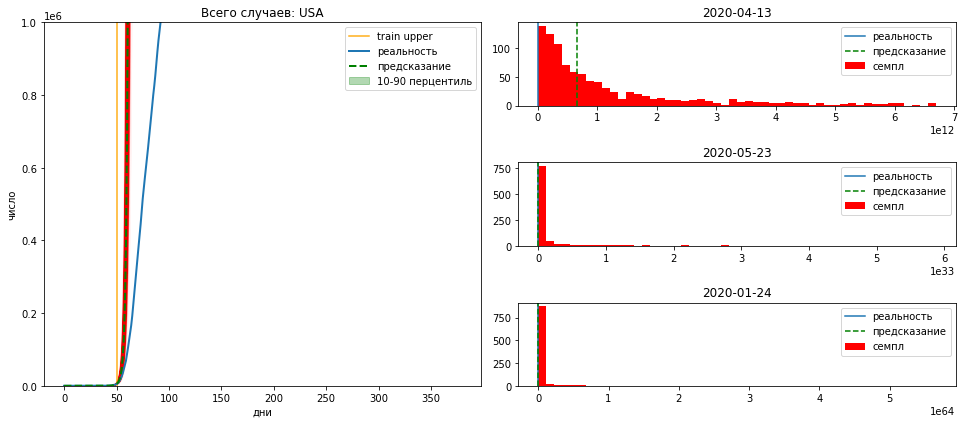

In [27]:
iso = 'USA'
data_en = data_all[data_all['iso_code'] == iso]
preds, samples = sample_errfs(data_en, bad_models[iso], iso, 
                              days=[80, 120, 160], 
                              day_labels=['2020-04-13', '2020-05-23', '2020-01-24'], 
                              n_samples=1000, figsize=(13.5, 6))

**Кластеризация:**
    
Возьмем "хорошие" модели и посмотрим на их параметры. Заметим, что мы обучали параметры $w_0, w_1, w_2$, но физический смысл имеют как раз исходные параметры:
$$
y(x) \sim C\int_{-\infty}^{Ax + B} e^{-t^2/2}dt.
$$
Здесь $C$ можно трактовать как объем насыщения пандемии, $А$ - показатель роста числа заболевших, $B$ - запаздывание начала пандемии. Поэтому попытамся кластеризовать данные как в координатах $w_0, w_1, w_2$, так и в координатах $A, B, C$.

In [28]:
# w0, w1, w2
points = []
for iso in good_models:
    model_iso = good_models[iso]
    points.append(model_iso.mu_N)
points = pd.DataFrame(np.asarray(points), columns=['w0', 'w1', 'w2'])
points['iso_code'] = good_models.keys()

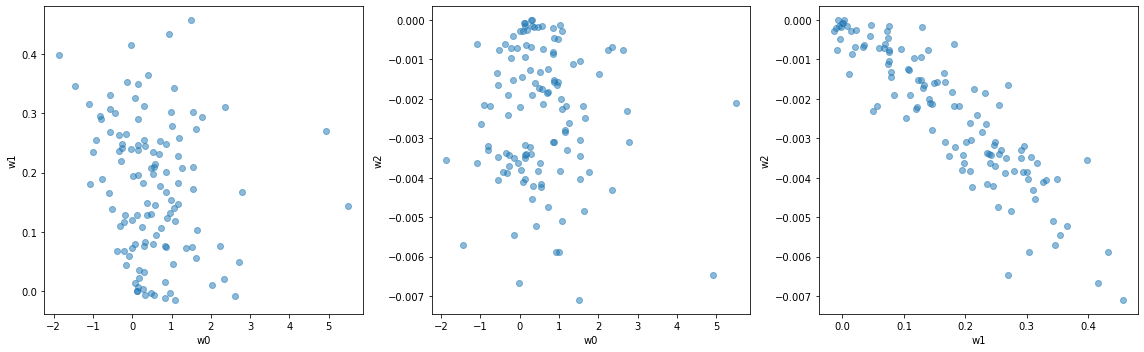

In [29]:
plot_parameter_cloud(points)

In [30]:
# A, B, C
initials = np.zeros((len(good_models), 3), dtype=float)
initials[:, 0] = np.sqrt(-2*points['w2'].values)
initials[:, 1] = -points['w1'].values / initials[:, 0]
initials[:, 2] = np.exp(np.log(initials[:,0]) - initials[:,1]**2/2 - points['w0'].values)
initials = pd.DataFrame(np.asarray(initials), columns=['A', 'B', 'C'])
initials['iso_code'] = good_models.keys()

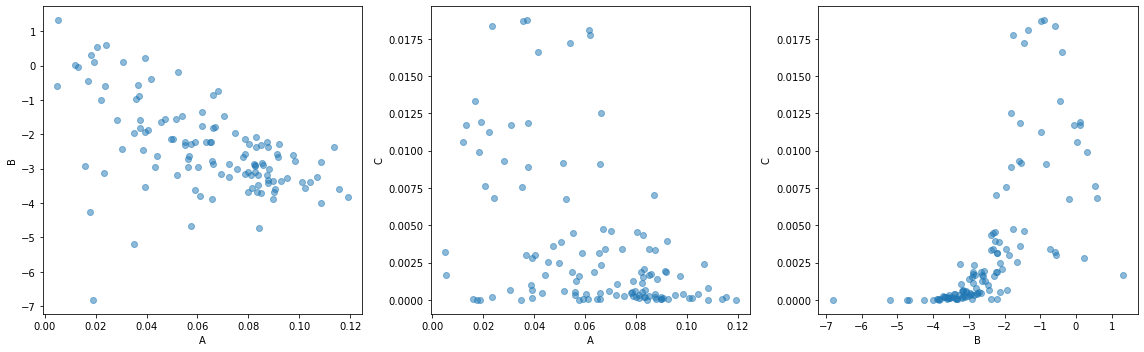

In [31]:
plot_parameter_cloud(initials)

Ни в одних, ни в других координатах кластеров явно не выделяется. Однако в естественных координатах $A, B, C$ более отчетливо виден сгусток точек, который можно трактовать как окестность некоторых характерных значений. Остальные можно считать нехарактерными, выбросами.

Последняя попытка: вспомним что коэффициент $C$ - это объем насыщения пандемии. Обезразмерим его, поделив на популяцию в соответствующей стране (данные на 2020 год).

In [32]:
population = pd.read_csv('population.csv')
initials_normed = initials.merge(population, on='iso_code').dropna()
initials_normed['C\''] = initials_normed['C'] / initials_normed['population']
initials_normed = initials_normed[initials_normed['C\''] < 2e-9]
initials_normed.head()

,A,B,C,iso_code,population,C'
0,0.039321,-3.530535,0.000130,AFG,38928346,3.337887e-12
1,0.045606,-1.648826,0.002530,ALB,2877797,8.791484e-10
3,0.056171,-2.727484,0.000512,ARG,45195774,1.132058e-11
4,0.039260,-1.928577,0.000648,ARM,2963243,2.187121e-10
5,0.115453,-3.598019,0.000183,AUT,9006398,2.030246e-11


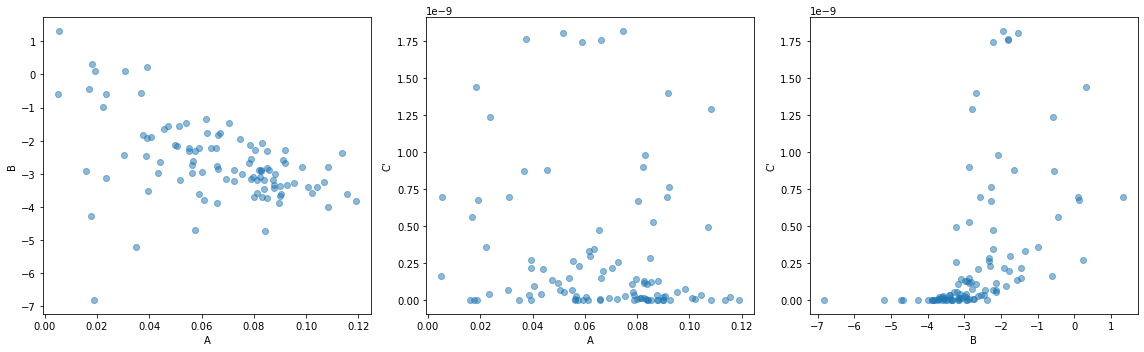

In [33]:
plot_parameter_cloud(initials_normed[['A', 'B', 'C\'', 'iso_code']])

Кластеры, к сожалению, так и не обозначились.

**Выводы:**

- кластеры четко не выделяются.
- зато в естественных координатах $A, B, C$ можно выделить облако точек, соответствующих некоторым "обычным" условиям развития пандемии - низкая доля заболевших среди всей популяции ($C' \approx 10^{-10}$) и некоторой средней задержкой ($B\approx-3$) в развитии пандемии. Остальные нехарактерные точки - **аномалии**, соответствующие странам с существенно большей долей заразившихся людей среди всего населения ($C' >> 10^{-10}$).

### Задача 5: Мысли

Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

**Основные выводы:**

1. численность заболевших короновирусом поддается моделированию, но, для ряда стран весьма неточно.

2. простая экспонециальная модель, обучаемая как линейная регрессия, годится только на самых ранних стадиях развития эпидемии, когда число заболевших не слишком высоко (отражение главного принципа линеаризации в диф. уравнениях - все уравнения линейны, пока неизвестные величины невелики: $y' = f(y) \implies y' \approx ay \implies y = Ce^{ax}$ - вообще говоря, только если $y << 1$).

3. более сложная erf-модель может показать себя лучше, но только когда пик пандемии (максимум $y'$) уже пройден. В противном случае коэффициент при $x^2$ скорее всего обучится в положительное значение, и erf-модель перестанет иметь смысл.

4. эффект п. 3 может приносить и пользу: к примеру, если коэффициент при $x^2$ обучился быть $>0$, то это означает, что пик пандемии еще не пройден. Если при этом еще количество заболевших превысило некоторый порог, то это два факта вместе можно истолковывать как **сигнал к немедленному введению карантина** - количество заболевших велико и не собирается падать:

вводим карантин, если
$$
\mu_N[-1] = \Sigma_N\left(\Sigma_0^{-1}\mu_0 + \frac{1}{\sigma^2}X^Ty\right)[-1] > 0, \quad y[-1] > T,
$$
где $[-1]$ - последнее значение в массиве, a порог $T$ выбирается из других соображений (обстановка в стране, сознательность граждан, численность популяции и др.).

5. по итогам моделирования (там, где его можно считать успешным) можно сказать, что коронавирус, как и любая другая эпидемия, идет на спад после некоторого момента. Если не прозевать сигнал в введении карантина (см. п.4), то количество заболевших можно существенно уменьшить.

6. в большинстве стран доля заболевших довольно невысока.